# Table of Contents
 <p><div class="lev2 toc-item"><a href="#understanding-of-the-origin-and-structure-of-the-data" data-toc-modified-id="understanding-of-the-origin-and-structure-of-the-data-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>understanding of the origin and structure of the data</a></div><div class="lev2 toc-item"><a href="#histogram" data-toc-modified-id="histogram-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>histogram</a></div><div class="lev3 toc-item"><a href="#histogram-using-facet_wrap" data-toc-modified-id="histogram-using-facet_wrap-0.2.1"><span class="toc-item-num">0.2.1&nbsp;&nbsp;</span>histogram using facet_wrap</a></div><div class="lev2 toc-item"><a href="#Box-plots" data-toc-modified-id="Box-plots-0.3"><span class="toc-item-num">0.3&nbsp;&nbsp;</span>Box plots</a></div><div class="lev3 toc-item"><a href="#box-plot-using-order" data-toc-modified-id="box-plot-using-order-0.3.1"><span class="toc-item-num">0.3.1&nbsp;&nbsp;</span>box plot using order</a></div><div class="lev2 toc-item"><a href="#bar-charts" data-toc-modified-id="bar-charts-0.4"><span class="toc-item-num">0.4&nbsp;&nbsp;</span>bar charts</a></div><div class="lev3 toc-item"><a href="#bar-plot-using-order" data-toc-modified-id="bar-plot-using-order-0.4.1"><span class="toc-item-num">0.4.1&nbsp;&nbsp;</span>bar plot using order</a></div><div class="lev2 toc-item"><a href="#scatterplots" data-toc-modified-id="scatterplots-0.5"><span class="toc-item-num">0.5&nbsp;&nbsp;</span>scatterplots</a></div><div class="lev3 toc-item"><a href="#scatterplots-with-sizes-and-colors" data-toc-modified-id="scatterplots-with-sizes-and-colors-0.5.1"><span class="toc-item-num">0.5.1&nbsp;&nbsp;</span>scatterplots with sizes and colors</a></div><div class="lev2 toc-item"><a href="#Time-series-plots" data-toc-modified-id="Time-series-plots-0.6"><span class="toc-item-num">0.6&nbsp;&nbsp;</span>Time series plots</a></div><div class="lev3 toc-item"><a href="#time-series-plots-using-sizes-and-colors" data-toc-modified-id="time-series-plots-using-sizes-and-colors-0.6.1"><span class="toc-item-num">0.6.1&nbsp;&nbsp;</span>time series plots using sizes and colors</a></div><div class="lev2 toc-item"><a href="#Dealing-with-uncertainity" data-toc-modified-id="Dealing-with-uncertainity-0.7"><span class="toc-item-num">0.7&nbsp;&nbsp;</span>Dealing with uncertainity</a></div><div class="lev3 toc-item"><a href="#error-bars-for-bar-plot" data-toc-modified-id="error-bars-for-bar-plot-0.7.1"><span class="toc-item-num">0.7.1&nbsp;&nbsp;</span>error bars for bar plot</a></div><div class="lev3 toc-item"><a href="#error-bars-for-scatterplot" data-toc-modified-id="error-bars-for-scatterplot-0.7.2"><span class="toc-item-num">0.7.2&nbsp;&nbsp;</span>error bars for scatterplot</a></div>

## understanding of the origin and structure of the data

data source: https://www.epa.gov/outdoor-air-quality-data

In [83]:
setwd("E:/postachio-blog-posts/Air-Quality")

In [84]:
 #loading csv files
Data <- read.table(file="EPA_Data.csv",
                  sep=",",
                  header=TRUE,
                  colClasses=c("Date","factor", rep("numeric", 5)),
                  na.strings="NA")

In [85]:
library("ggplot2")

In [86]:
str(Data)

'data.frame':	2190 obs. of  7 variables:
 $ Date       : Date, format: "2013-01-01" "2013-01-02" ...
 $ State      : Factor w/ 6 levels "California","Iowa",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Temperature: num  5.61 6.5 6.93 6.57 7.11 6.97 7.94 9.77 9.78 6.21 ...
 $ CO         : num  0.52 0.59 0.65 0.65 0.64 0.45 0.5 0.64 0.64 0.34 ...
 $ NO2        : num  11.3 15.8 17.3 18.8 17 ...
 $ SO2        : num  0.53 0.69 0.75 0.79 0.7 0.43 0.53 0.78 0.74 0.34 ...
 $ Pressure   : num  985 983 984 986 985 ...


## histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


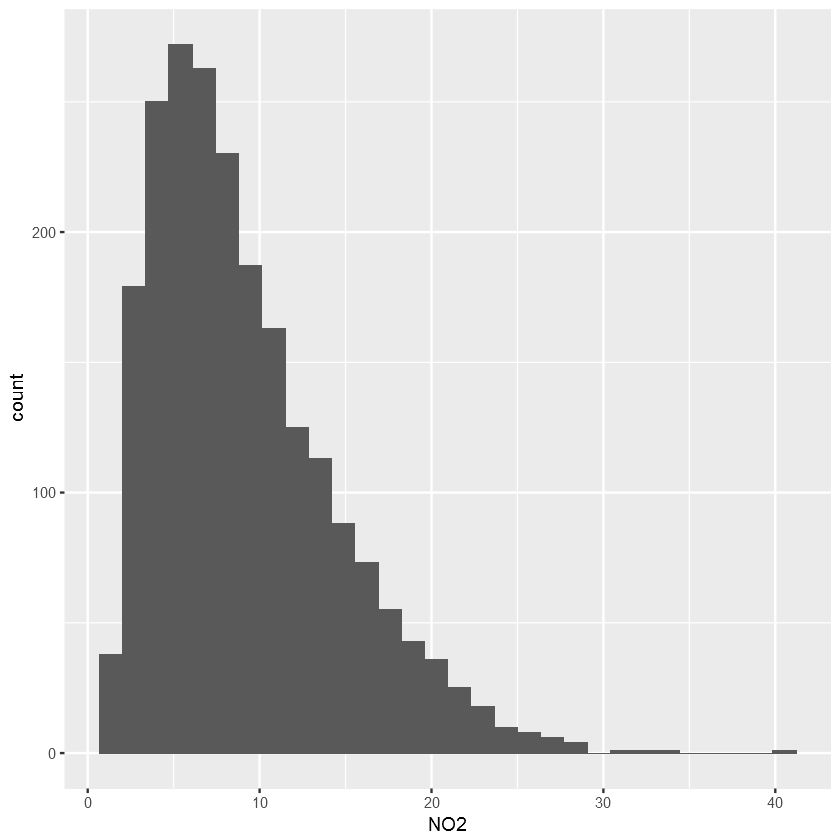

In [87]:
ggplot(data=Data, aes(x = NO2)) +
       geom_histogram()

### histogram using facet_wrap

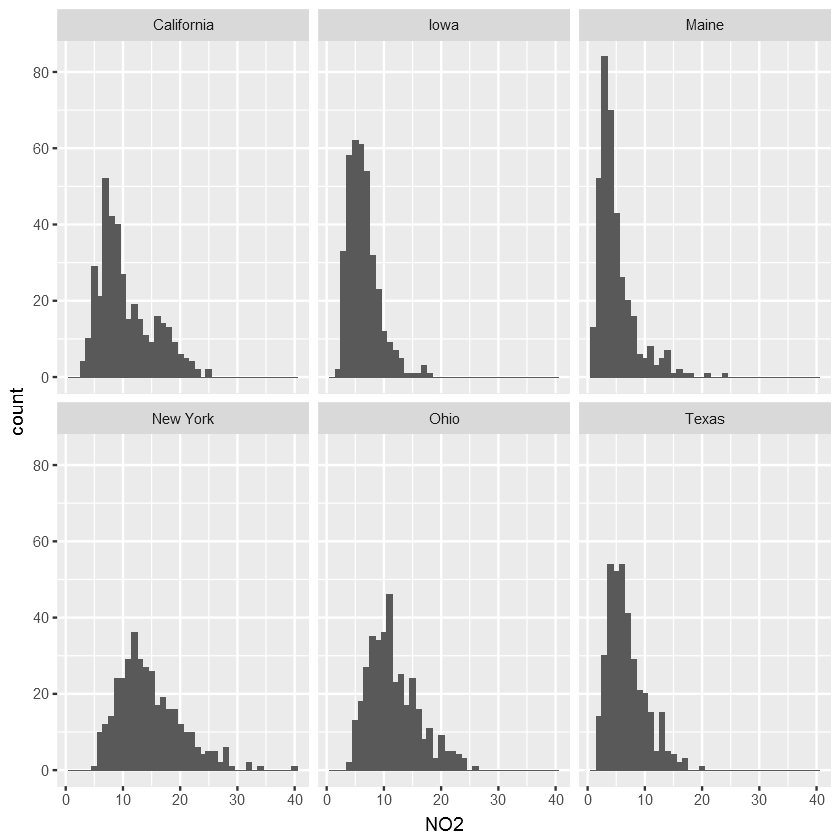

In [88]:
ggplot(data=Data, aes(x = NO2)) +
       geom_histogram(binwidth = 1) +
facet_wrap(~State)

## Box plots
Box plots can be used comparing several variables at once  
they allow the comparison of the distribution of multiple variables side by side.    
* Explain what a box plot is and what does it represents
* Create multiple box plots with just two lines of code
* Order the plot to achieve better results 

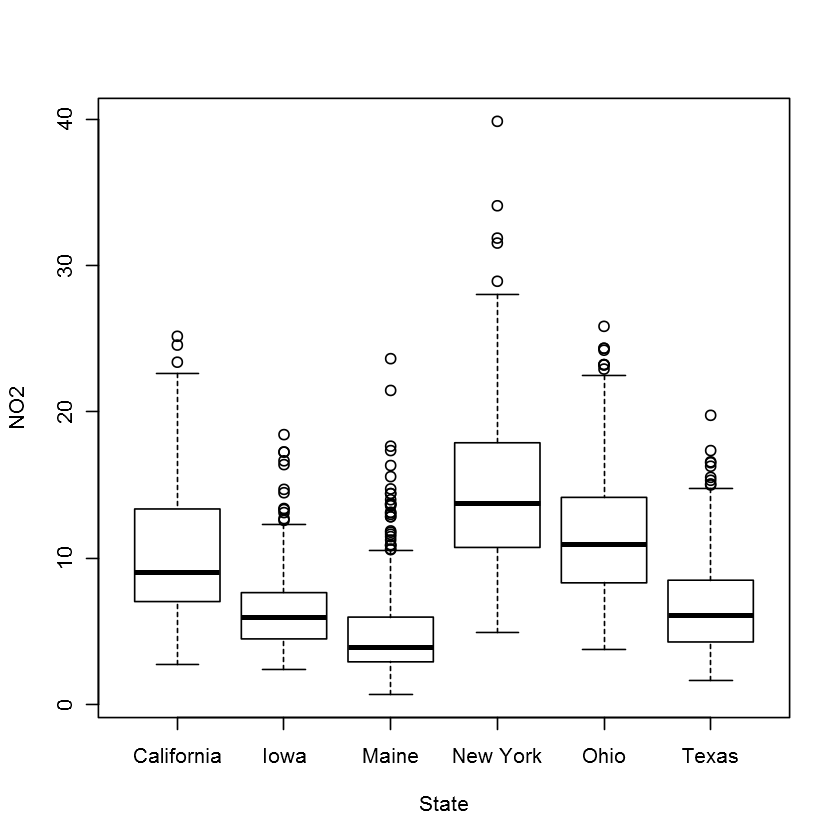

In [89]:
# Base box plot structure is
boxplot(NO2 ~ State, data=Data, xlab ="State", ylab="NO2")
# ?boxplot

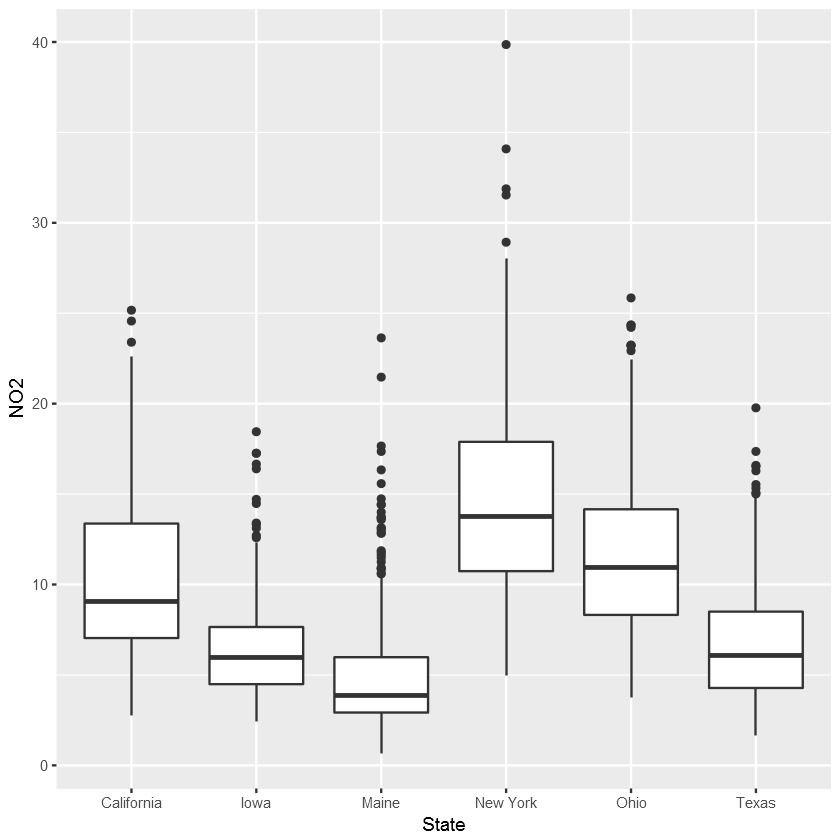

In [90]:
# create boxplot using ggplot2
ggplot(data=Data, aes(x=State, y= NO2)) +
geom_boxplot()

### box plot using order

In [91]:
#Ordered
# unique(Data$State)
ordered <- c("Maine", "Iowa", "Texas", "California",  "Ohio", "New York" )

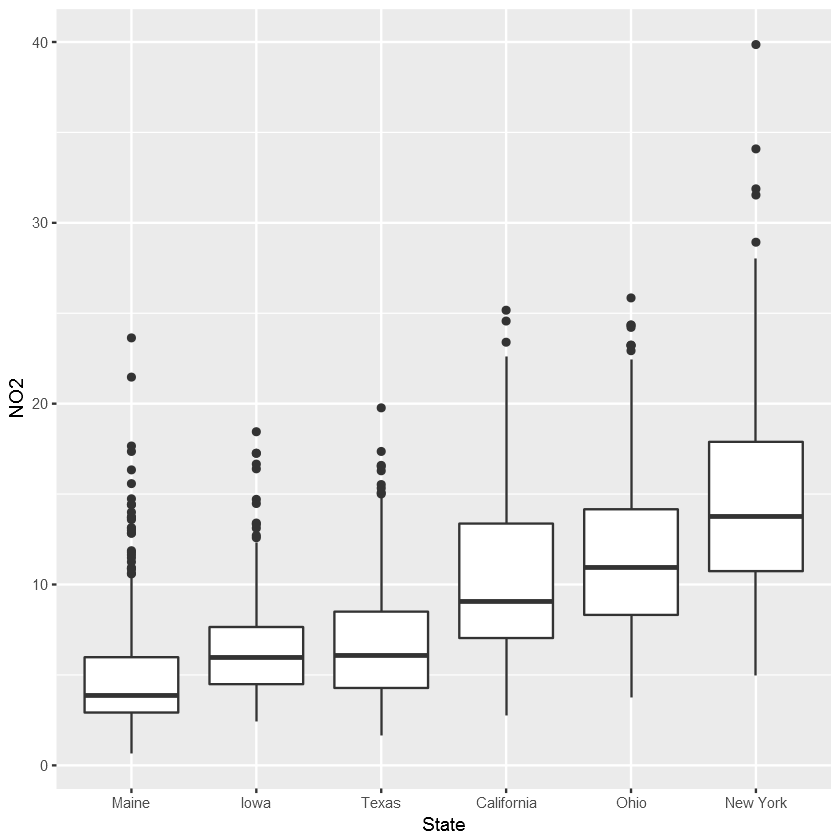

In [92]:
ggplot(data=Data, aes(x=State, y= NO2)) +
geom_boxplot() +
scale_x_discrete(limits=ordered)


## bar charts

In [93]:
#let us create subset of our data
# including just observatins on October 1st
Polution_1stOct2013 <- Data[Data$Date=='2013-10-01',]

In [94]:
Polution_1stOct2013

,Date,State,Temperature,CO,NO2,SO2,Pressure
274,2013-10-01,California,18.47,0.32,10.56,0.64,970.68
637,2013-10-01,New York,17.34,0.26,21.20,1.00,983.87
1004,2013-10-01,Iowa,20.15,0.23,8.93,0.67,984.85
1458,2013-10-01,Texas,25.95,0.25,6.10,0.22,990.17
1734,2013-10-01,Ohio,19.57,0.40,19.89,1.34,988.58
2099,2013-10-01,Maine,15.07,0.14,6.77,0.12,1005.29


In [95]:
str(Polution_1stOct2013)

'data.frame':	6 obs. of  7 variables:
 $ Date       : Date, format: "2013-10-01" "2013-10-01" ...
 $ State      : Factor w/ 6 levels "California","Iowa",..: 1 4 2 6 5 3
 $ Temperature: num  18.5 17.3 20.1 25.9 19.6 ...
 $ CO         : num  0.32 0.26 0.23 0.25 0.4 0.14
 $ NO2        : num  10.56 21.2 8.93 6.1 19.89 ...
 $ SO2        : num  0.64 1 0.67 0.22 1.34 0.12
 $ Pressure   : num  971 984 985 990 989 ...


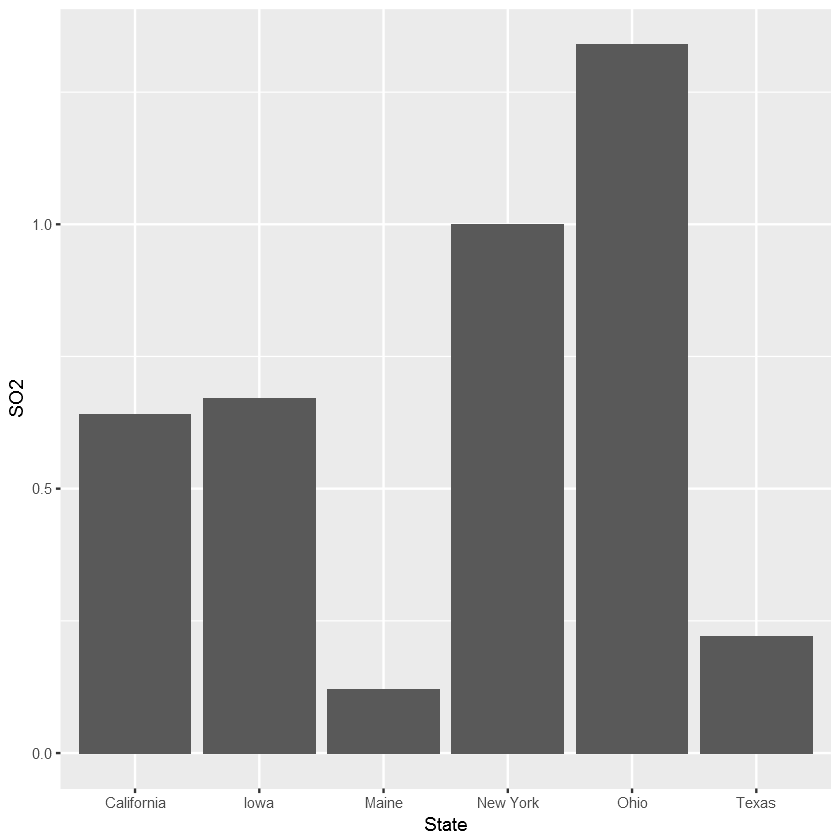

In [96]:
ggplot(data=Polution_1stOct2013, aes(x=State, y=SO2)) +
geom_bar(stat="identity")

### bar plot using order

In [97]:
# Order the columns
ordered  <- Polution_1stOct2013[order(Polution_1stOct2013$SO2),]

In [98]:
ordered

,Date,State,Temperature,CO,NO2,SO2,Pressure
2099,2013-10-01,Maine,15.07,0.14,6.77,0.12,1005.29
1458,2013-10-01,Texas,25.95,0.25,6.10,0.22,990.17
274,2013-10-01,California,18.47,0.32,10.56,0.64,970.68
1004,2013-10-01,Iowa,20.15,0.23,8.93,0.67,984.85
637,2013-10-01,New York,17.34,0.26,21.20,1.00,983.87
1734,2013-10-01,Ohio,19.57,0.40,19.89,1.34,988.58


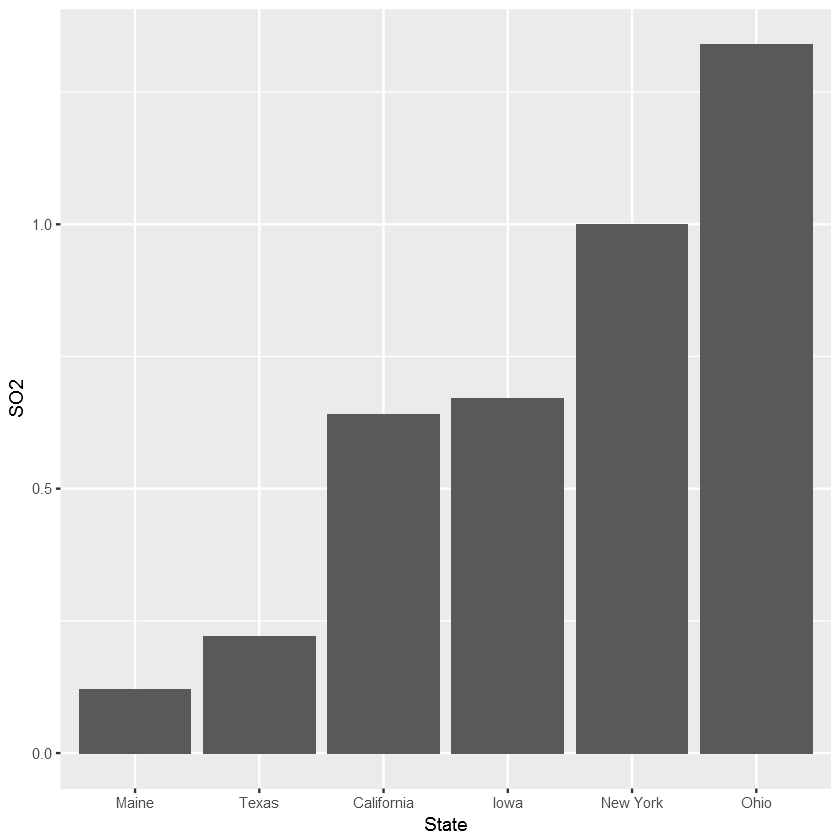

In [99]:
ggplot(data=Polution_1stOct2013, aes(x=State, y=SO2)) +
geom_bar(stat="identity") +
scale_x_discrete(limits=ordered$State)

## scatterplots

In [100]:
# Create a simple scatterplot
ls()

[1] "California"          "Data"                "ordered"            
[4] "Polution_1stOct2013" "Weekly_Values"

In [101]:
California <- Data[Data$State=="California",]

In [102]:
head(California)

Date,State,Temperature,CO,NO2,SO2,Pressure
2013-01-01,California,5.61,0.52,11.35,0.53,984.93
2013-01-02,California,6.50,0.59,15.83,0.69,983.13
2013-01-03,California,6.93,0.65,17.32,0.75,983.95
2013-01-04,California,6.57,0.65,18.79,0.79,985.96
2013-01-05,California,7.11,0.64,16.98,0.70,985.09
2013-01-06,California,6.97,0.45,9.61,0.43,981.56


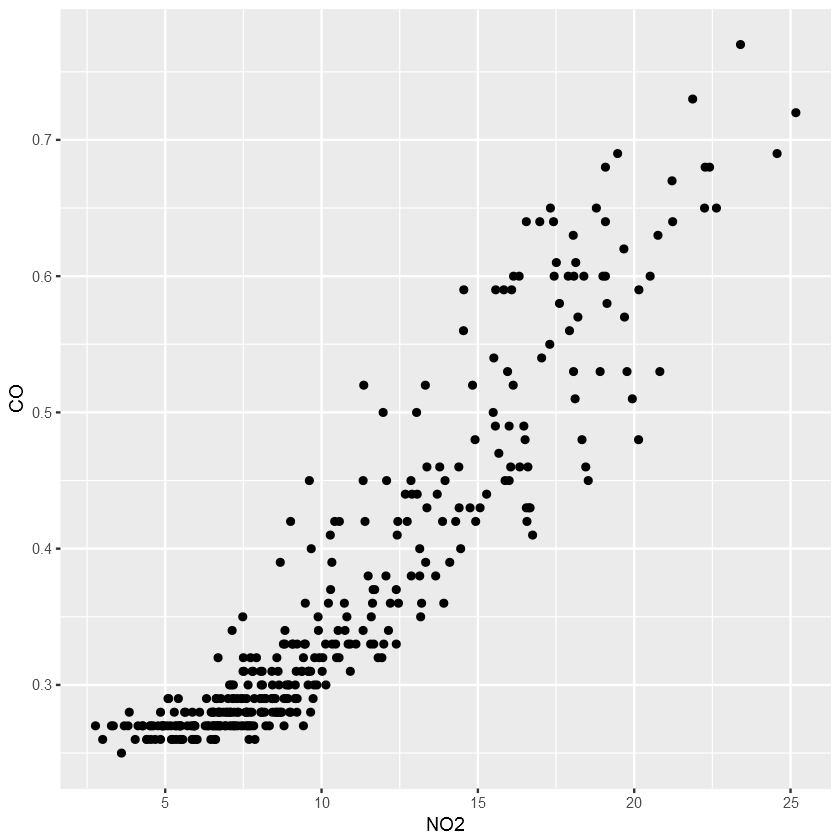

In [103]:
ggplot(data=California, aes(x=NO2, y=CO)) +
geom_point()

In [104]:
cor(Data$NO2, Data$CO)

[1] 0.6881239

In [105]:
cor(California$NO2, California$CO) #highly correlated

[1] 0.9257933

### scatterplots with sizes and colors

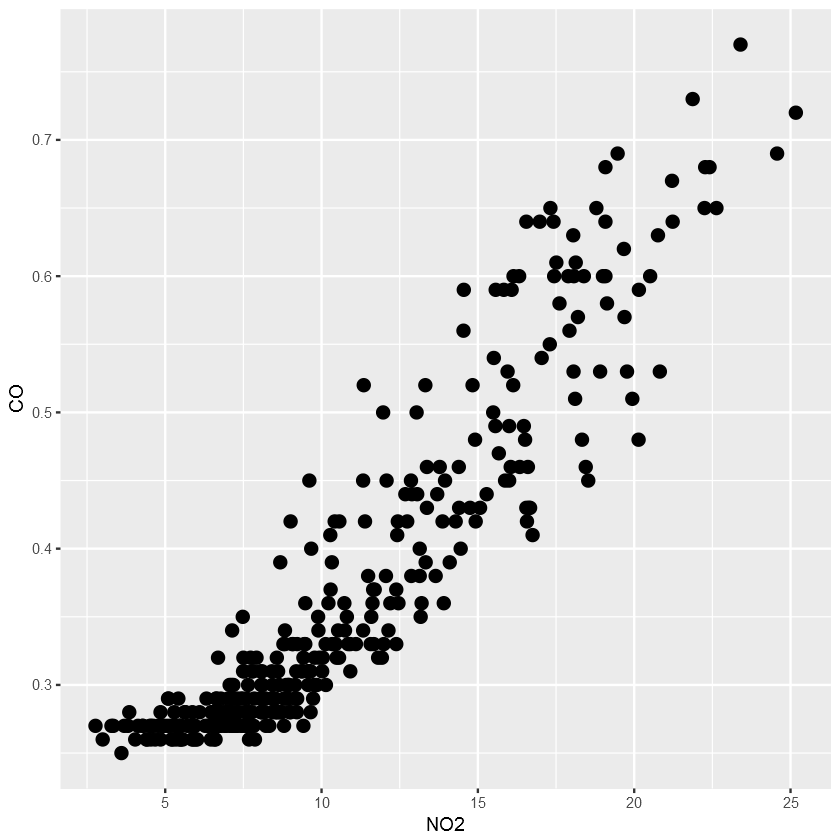

In [106]:
# increase the size of the dots
ggplot(data=California, aes(x=NO2, y=CO)) +
geom_point(size=3)

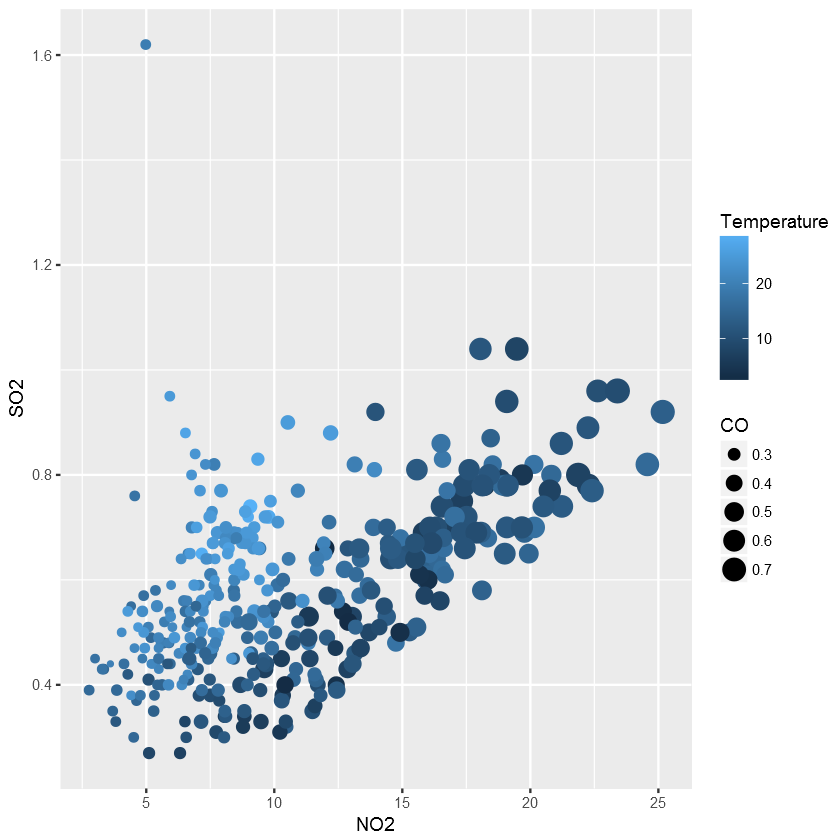

In [107]:
# increase the size and apply color
ggplot(data=California, aes(x=NO2, y=SO2, color=Temperature, size=CO)) +
geom_point()

## Time series plots
* dealing with the time
* time is represented along x-axis , the variable of interest taken as along y-axis

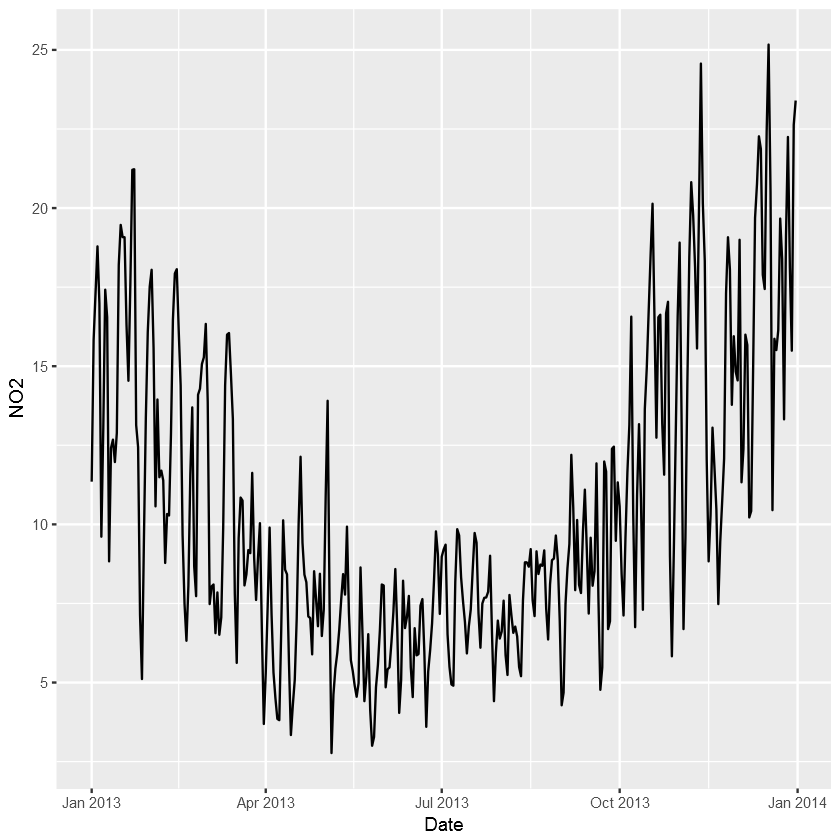

In [108]:
# create a simple time-series plot
ggplot(data=California, aes(x=Date, y= NO2)) +
geom_line()

### time series plots using sizes and colors

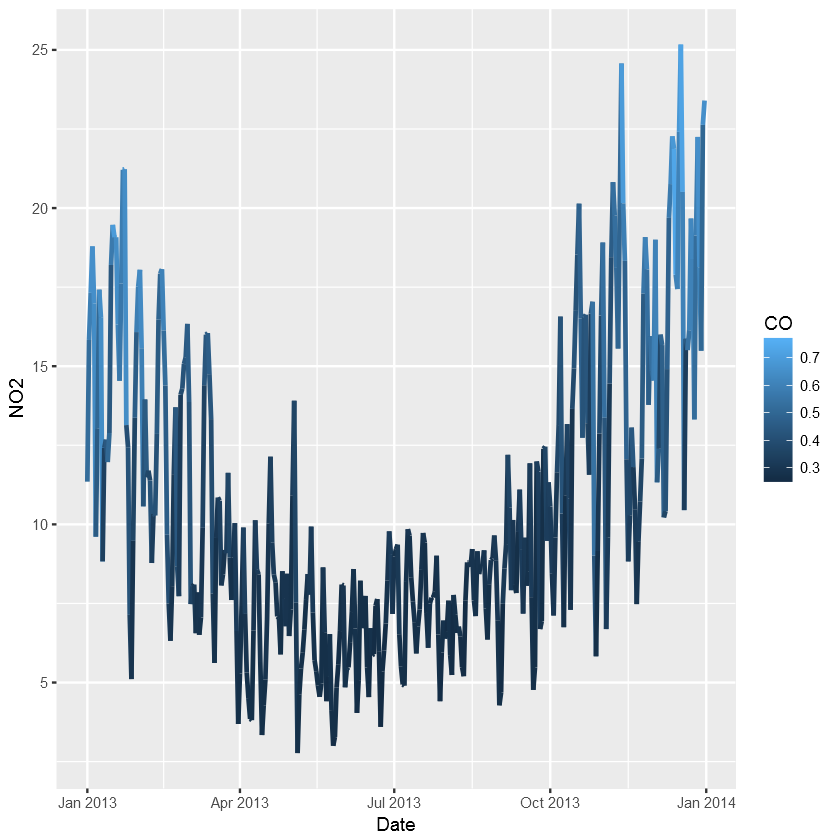

In [109]:
# add data as colors and change the line size
ggplot(data=California, aes(x=Date, y= NO2, color=CO)) +
geom_line(size=1)

## Dealing with uncertainity
 *  how to show the uncertainity in the plots
* include uncertainty in bar-charts
* Present the scatterplots with double error bars 

In [110]:
# Load dataset into R
Weekly_Values  <- read.table("Weekly_Values.csv", sep=",",
                            header=TRUE)


In [111]:
head(Weekly_Values)

State,SO2.mean,SO2.se,NO2.mean,NO2.se
California,0.6457143,0.01923463,11.010000,0.4510607
Iowa,1.3814286,0.15073838,5.552857,0.3232706
Maine,0.1942857,0.01411462,5.031429,0.3305761
New York,0.8971429,0.02620840,17.964286,1.1132849
Ohio,1.2857143,0.06326629,15.664286,0.8680476
Texas,0.2628571,0.01418331,6.218571,0.4301482


In [112]:
str(Weekly_Values)

'data.frame':	6 obs. of  5 variables:
 $ State   : Factor w/ 6 levels "California","Iowa",..: 1 2 3 4 5 6
 $ SO2.mean: num  0.646 1.381 0.194 0.897 1.286 ...
 $ SO2.se  : num  0.0192 0.1507 0.0141 0.0262 0.0633 ...
 $ NO2.mean: num  11.01 5.55 5.03 17.96 15.66 ...
 $ NO2.se  : num  0.451 0.323 0.331 1.113 0.868 ...


In [113]:
ordered <- Weekly_Values[order(Weekly_Values$SO2.mean), ]  

### error bars for bar plot

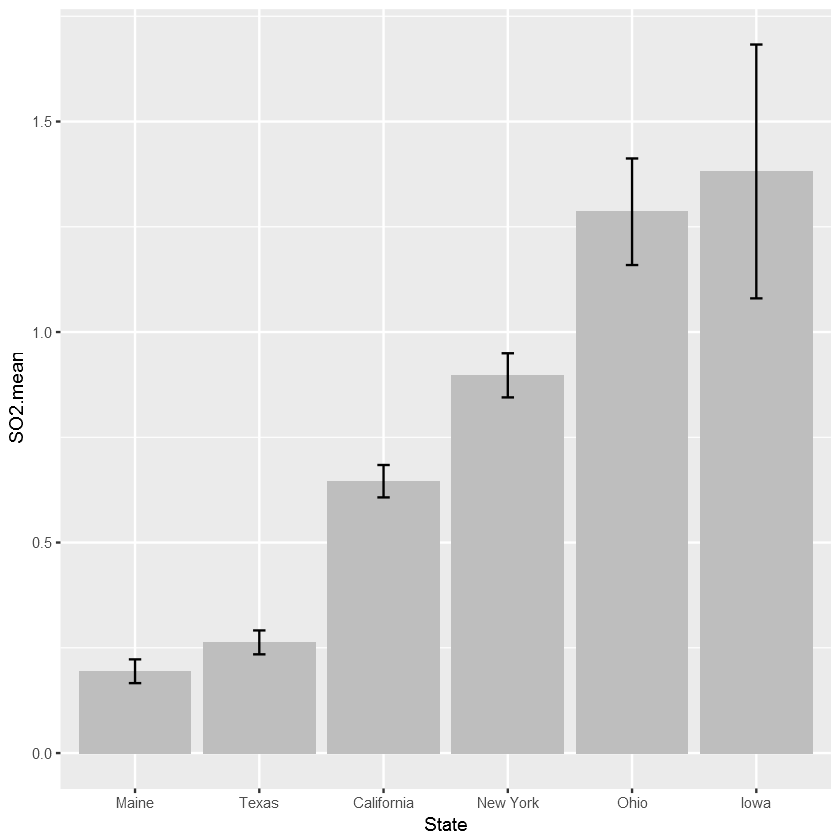

In [114]:
# plot error bars
ggplot(data=Weekly_Values, aes(x=State, y=SO2.mean)) +
geom_bar(stat="identity", fill="grey") +
scale_x_discrete(limits = ordered$State) +
geom_errorbar(data=Weekly_Values, aes(ymin=SO2.mean-(2*SO2.se), 
                                     ymax=SO2.mean+(2*SO2.se)),
             width=0.1)
                                     
                                     

### error bars for scatterplot

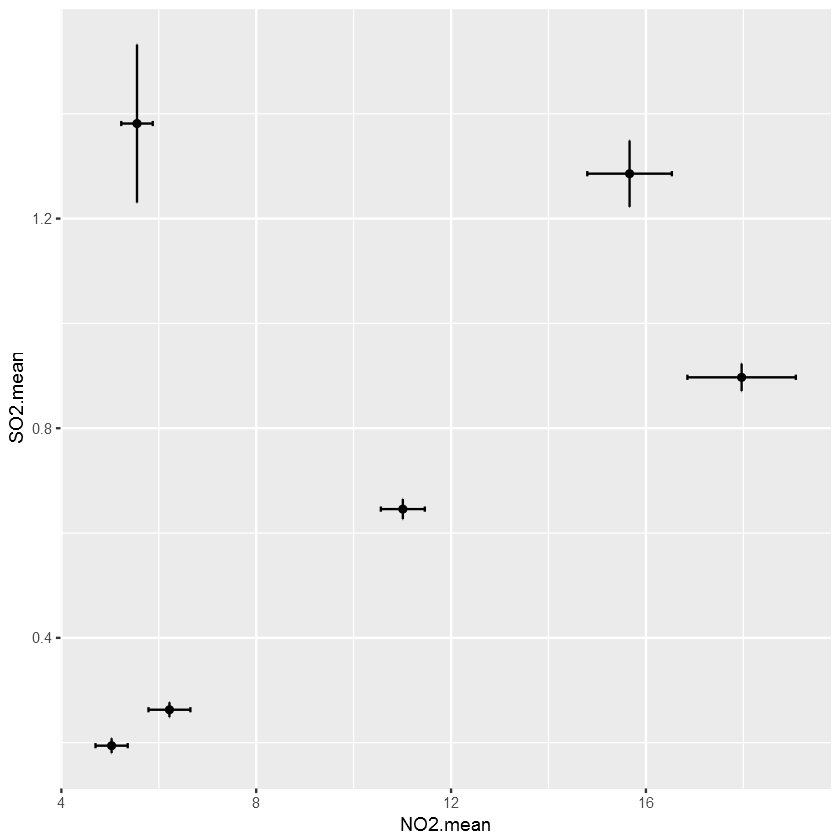

In [115]:
ggplot(data=Weekly_Values, aes(x=NO2.mean, y=SO2.mean)) +
geom_point(stat="identity", fill="grey") +
geom_errorbar(data=Weekly_Values, aes(ymin=SO2.mean-SO2.se,
                                     ymax=SO2.mean+SO2.se),
             width=0.01) +
geom_errorbarh(data=Weekly_Values, aes(xmin=NO2.mean-NO2.se,
                                     xmax=NO2.mean+NO2.se),
             height=0.01)